#### Import needed libraries  

In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline
ox.config(log_console=True, use_cache=True)

/Users/mark/anaconda3/envs/geo-env/lib/python3.11/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


### Function to color roads by the highway type

In [2]:
# This function takes the road name and it returns the color
def colorcode(highway_type):
    if ('primary' in highway_type): 
        return '#f6cf71'  #yellow
    elif ('trunk' in highway_type):
        return '#f6cf71'  #yellow
    elif ('secondary' in highway_type):
        return '#15964d'  #green
    elif ('tertiary' in highway_type):
        return '#15964d'  #green
    elif ('motorway' in highway_type):  # interstates and motorways
        return '#1C94F0'  #blue
    else:
        return '#313131'  #dark gray - all residential, living-streets, & unclassified

### Function to set the line width based on the highway type

In [3]:
# This function takes the highway type and a 3-letter code for the language and it returns the width of the line
def linewidth(highway_type):
    if ('primary' in highway_type): 
        return 0.5
    elif ('trunk' in highway_type):
        return 0.6
    elif ('secondary' in highway_type):
        return 0.35
    elif ('tertiary' in highway_type):
        return 0.35
    elif ('motorway' in highway_type):  # interstates and motorways
        return 0.7
    else:
        return 0  #dark gray - all residential, living-streets, & unclassified
    

## Create a networkx graph from OSM data 

In [4]:
place='Fayette County, Kentucky, United States'

graph = ox.graph_from_place(place, network_type='drive', truncate_by_edge=True, which_result=1)

### Convert the graph into GeoDataFrame

In [5]:
geo_df = ox.graph_to_gdfs(graph, nodes=False)

### Create coloring and line width list for each polyline

In [6]:
# iterate over each row of the dataframe, get the line color for each polyline
edgeColorList = [colorcode(str(row['highway']).lower()) for index, row in geo_df.iterrows()]

# iterate over each row of the dataframe, get the line width for each polyline
lineWidthList = [linewidth(str(row['highway']).lower()) for index, row in geo_df.iterrows()]

### Plot a networkx spatial graph  

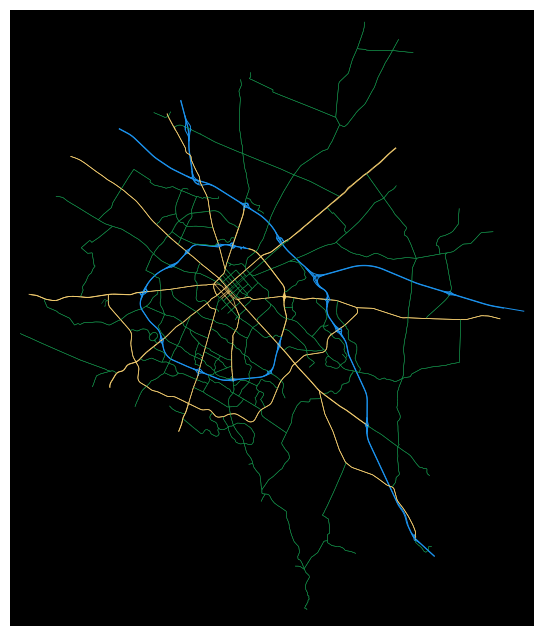

In [7]:
fig, ax = ox.plot_graph(graph,bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=edgeColorList, edge_linewidth=lineWidthList, edge_alpha=1, dpi=300)

### Output spatial graph to PNG file

In [8]:
fig.patch.set_facecolor('k')

fig.set_size_inches(10, 8.5)
fig.savefig('Fayette_County_KY_highways.png', facecolor = fig.get_facecolor(), dpi=300)

### Instructions for setting-up Python Conda environment

__Setting up a GEO/GIS environment__  
`conda create -n geo_env`   
`conda activate geo_env`  
`conda config --env --add channels conda-forge`  
`conda config --env --set channel_priority strict`  

__Install packages__  
`conda install python=3 geopandas pandas numpy shapely fiona pyproj six matplotlib mapclassify descartes osmnx networkx jupyterlab rtree geojson contextily folium ipyleaflet pysal rasterio rasterstats pycrs`  